# Heart Disease Classification Model
This notebook looks into using various python based Machine learning and Data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the f0llowing approch
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination
in a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. 
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

**Data Dictionary**

| Feature   | Description                                                                                       | Example Values                           |
|-----------|---------------------------------------------------------------------------------------------------|------------------------------------------|
| age       | Age in years                                                                                      | 29, 45, 60                                |
| sex       | 1 = male; 0 = female                                                                              | 0, 1                                     |
| cp        | Chest pain type                                                                                   | 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic |
| trestbps  | Resting blood pressure (in mm Hg on admission to the hospital)                                    | 120, 140, 150                             |
| chol      | Serum cholesterol in mg/dl                                                                        | 180, 220, 250                             |
| fbs       | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                             | 0, 1                                     |
| restecg   | Resting electrocardiographic results                                                              | 0: Normal, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy |
| thalach   | Maximum heart rate achieved                                                                       | 160, 180, 190                             |
| exang     | Exercise induced angina (1 = yes; 0 = no)                                                         | 0, 1                                     |
| oldpeak   | ST depression induced by exercise relative to rest                                                | 0.5, 1.0, 2.0                             |
| slope     | The slope of the peak exercise ST segment                                                         | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| ca        | Number of major vessels (0-3) colored by fluoroscopy                                              | 0, 1, 2, 3                                |
| thal      | Thalium stress result                                                                             | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| target    | Have disease or not (1 = yes; 0 = no)                                                              | 0, 1                                     |


## Preparing the tools
We are going to use Pandas, Numpy and Matplotlib for data analysis and manipulation

In [78]:
## Regular EDA and Plotting tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

### Key Questions to Explore

- **What question(s) are you trying to solve?**
- **What kind of data do we have and how do we treat different types?**
- **What's missing from the data and how do you deal with it?**
- **Where are the outliers and why should you care about them?**
- **How can you add, change or remove features to get more out of your data?**


In [4]:
df.shape

(303, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

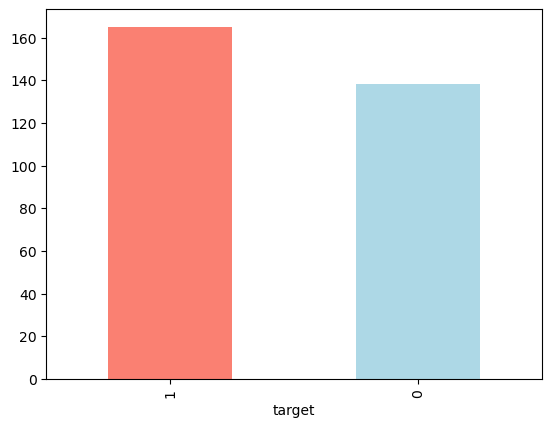

In [8]:
df["target"].value_counts().plot.bar(color=["salmon", "lightblue"])
plt.show();

In [9]:
target_by_sex=pd.crosstab(df["target"], df["sex"])
target_by_sex

sex,0,1
target,,
0,24,114
1,72,93


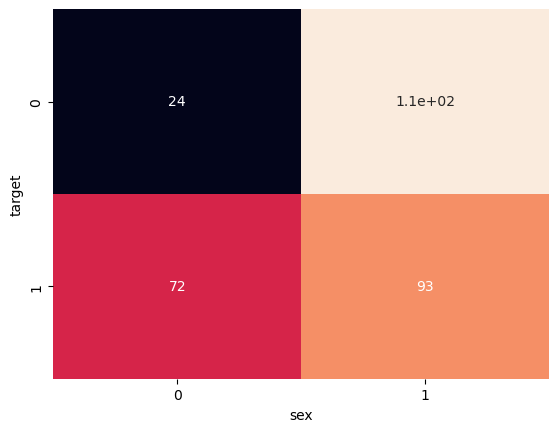

In [10]:
sns.heatmap(target_by_sex, annot=True, cbar=False);

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

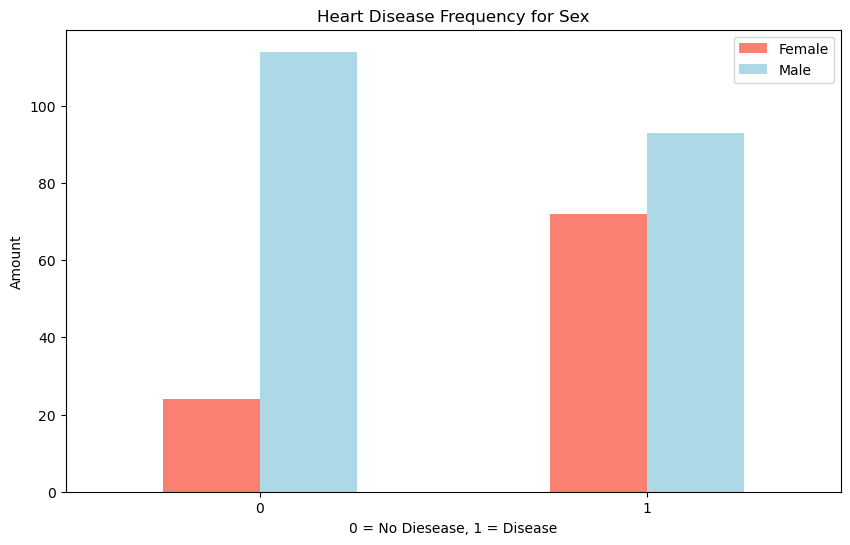

In [11]:
target_by_sex.plot.bar(figsize=[10,6], color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs Max Heart rate for heart disease

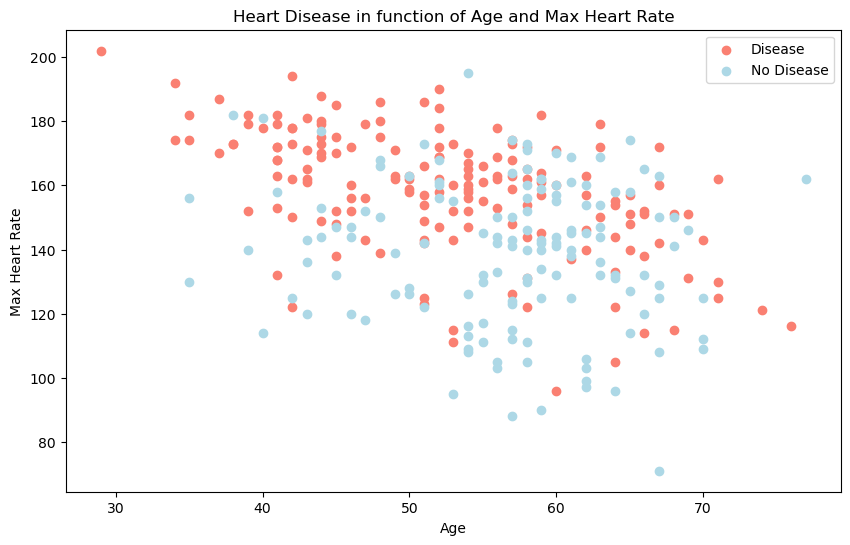

In [13]:
plt.figure(figsize=[10,6])
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon');
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue');
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


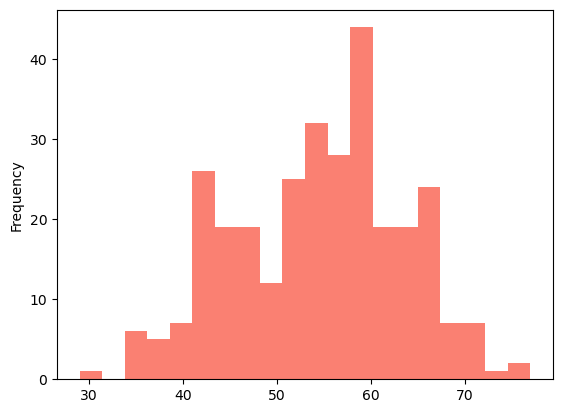

In [14]:
df["age"].plot.hist(bins=20, color=['salmon']);

In [15]:
chestpain_to_target=pd.crosstab(df.cp, df.target)

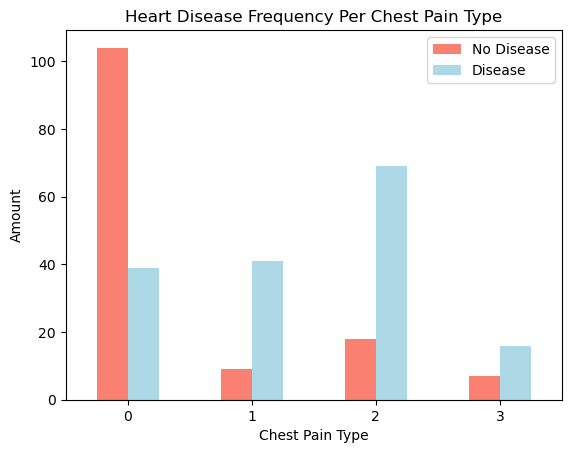

In [16]:
chestpain_to_target.plot.bar(color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


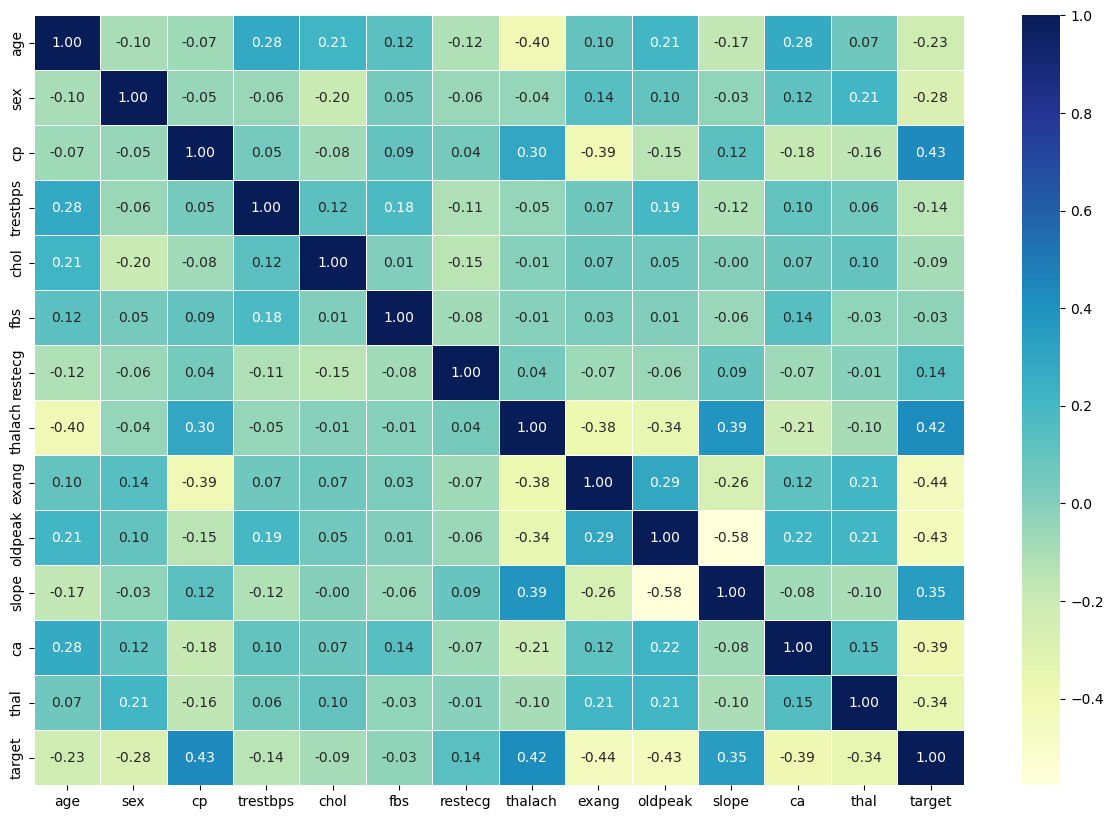

In [18]:
corr_matrix=df.corr()
fig, ax= plt.subplots(figsize=[15,10])
ax=sns.heatmap(corr_matrix, 
                annot=True, 
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X=df.drop('target', axis=1)
y=df['target']

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

Now we have got are data split into training and test sets it's time to build a machine learning model. We'll train it (find the pattrens on training set) and well test it (use the pattrens on test set)
**We are going to try 3 diffrent machine learning models**
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. RandomForestClassifier

In [24]:
## Put models in dictionary
models = {
    "logistic_regression": LogisticRegression(),
    "kn_neighbors_classifier": KNeighborsClassifier(),
    "random_forest_classifier": RandomForestClassifier()
}


In [67]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: A dict of diffrent scikit_learn machine learning models.
    X_train: Training data (No labels)
    X_test: Testing data (No labels)
    y_train: Trainig labels
    y_test: Test labels
    """
    model_score={}
    np.random.seed(42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_score[model_name]=model.score(X_test, y_test)
    return model_score
    

In [68]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/home/hmad/code/python/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic_regression': 0.8360655737704918,
 'kn_neighbors_classifier': 0.639344262295082,
 'random_forest_classifier': 0.8524590163934426}

In [69]:
model_compare=pd.DataFrame(model_scores, index=['Accuracy'])

In [70]:
model_compare

,logistic_regression,kn_neighbors_classifier,random_forest_classifier
Accuracy,0.836066,0.639344,0.852459


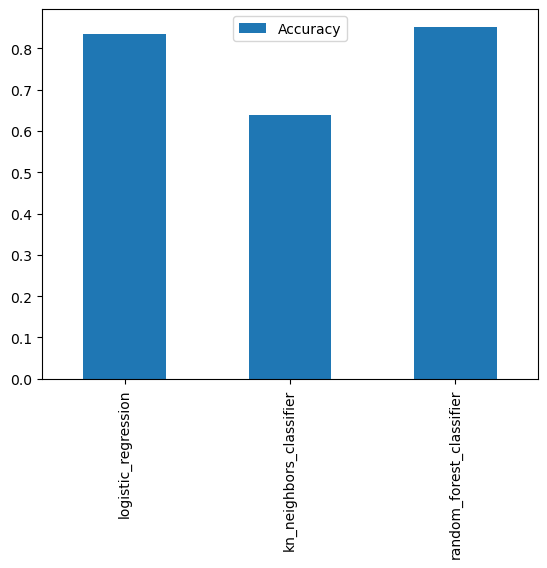

In [71]:
model_compare.T.plot.bar();

Now we've got our baseline model let's jump further and look into the following
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under curve (AUC)

## HyperParameter Tuning


In [72]:
## Trying to tune kn neighborsclassifier
train_score=[]
test_score=[]

knn=KNeighborsClassifier()

neighbors=np.arange(1,21)
for i in neighbors:
    np.random.seed(42)
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

print(train_score)
print(" ")
print(test_score)

[1.0, 0.7933884297520661, 0.7727272727272727, 0.7520661157024794, 0.7396694214876033, 0.7644628099173554, 0.743801652892562, 0.71900826446281, 0.7024793388429752, 0.7024793388429752, 0.6818181818181818, 0.6735537190082644, 0.6983471074380165, 0.6983471074380165, 0.6900826446280992, 0.6859504132231405, 0.6735537190082644, 0.6735537190082644, 0.6859504132231405, 0.6859504132231405]
 
[0.5409836065573771, 0.6065573770491803, 0.6229508196721312, 0.6065573770491803, 0.639344262295082, 0.639344262295082, 0.6885245901639344, 0.6557377049180327, 0.639344262295082, 0.6557377049180327, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.6885245901639344, 0.7213114754098361, 0.7377049180327869, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853]


Max KNN score on test set 73.77%


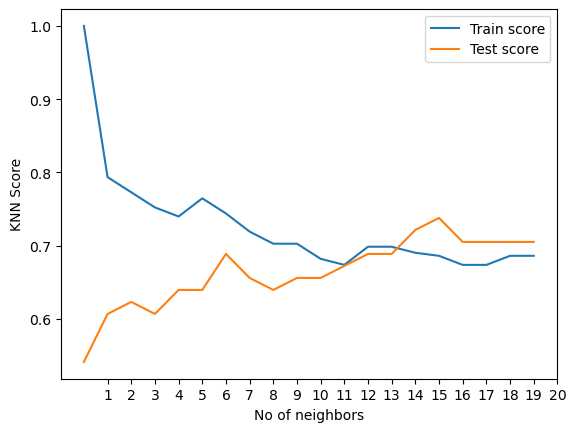

In [31]:
plt.plot(train_score, label="Train score");
plt.plot(test_score, label="Test score");
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of neighbors")
plt.ylabel("KNN Score")
plt.legend()

print(f"Max KNN score on test set {max(test_score)*100:.2f}%")

## Tuning HyperParameters using RandomizedSearchCV
we're going to tune
* RandomForestClassifier
* LogisticRegression

In [32]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
## Logistic regression hyperparameter grid
log_reg_grid={
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}
## RandomForestClassifier hyperparameter grid
rf_grid={
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [35]:
## Trying RandomizedSearchCV on LogisticRegression
np.random.seed(42)
log_reg=LogisticRegression()
rs_log_reg=RandomizedSearchCV(estimator=log_reg, param_distributions=log_reg_grid,n_iter=20, cv=5, verbose=2 )
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [37]:
rs_log_reg_score=rs_log_reg.score(X_test, y_test)
rs_log_reg_score

0.8360655737704918

In [38]:
## Trying RandomizedSearchCV on RandomForestClassifier
np.random.seed(42)
rf=RandomForestClassifier()
rs_rf=RandomizedSearchCV(estimator=rf, param_distributions=rf_grid,n_iter=20,cv=5, verbose=2 )
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.8s
[CV] END max_de

In [39]:
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(17),
 'max_depth': 5}

In [40]:
rs_rf.score(X_test, y_test)

0.8032786885245902

In [41]:
model_scores

{'logistic_regression': 0.8360655737704918,
 'kn_neighbors_classifier': 0.639344262295082,
 'random_forest_classifier': 0.8524590163934426}

## Hyperparameter Tuning GridSearchCV

In [42]:
log_reg_grid={
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}
np.random.seed(42)
gs_log_reg=GridSearchCV(estimator=LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=2)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

In [43]:
gs_log_reg.best_params_

{'C': np.float64(1.623776739188721), 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

In [45]:
model_scores

{'logistic_regression': 0.8360655737704918,
 'kn_neighbors_classifier': 0.639344262295082,
 'random_forest_classifier': 0.8524590163934426}

In [64]:
gs_rf_grid={
    'n_estimators':[100, 200],
    'max_depth':[None,6],
    'min_samples_split':[ 6],
    'min_samples_leaf': [1,3]
}
gs_rf=GridSearchCV(RandomForestClassifier(),param_grid=gs_rf_grid, cv=5, verbose=2)
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_

In [73]:
gs_rf.best_params_

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

In [74]:
gs_rf.score(X_test, y_test)

0.8360655737704918

In [76]:
model_scores

{'logistic_regression': 0.8360655737704918,
 'kn_neighbors_classifier': 0.639344262295082,
 'random_forest_classifier': 0.8524590163934426}

## Evaluating our tuned machine learning classifier beyond accuracy
Since **RandomForestClassifer** with default parameters is performing the best under all circumstances we'll go with that and start Evaluating

* AUC and ROC Curve
* Confusion Matrix
* Classification Report
* Precision Score
* Recall Score
* F1 Score

In [82]:
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

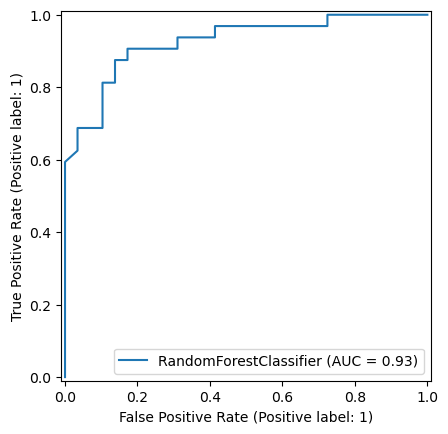

In [83]:
## Plot ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show();

In [84]:
y_preds=clf.predict(X_test)
conf_mat=confusion_matrix(y_test, y_preds)
conf_mat

array([[24,  5],
       [ 4, 28]])

In [85]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots confusion matrix usinf seaborn
    """
    fig, ax=plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True labels")
    plt.ylabel("predicted labels")
    plt.show()

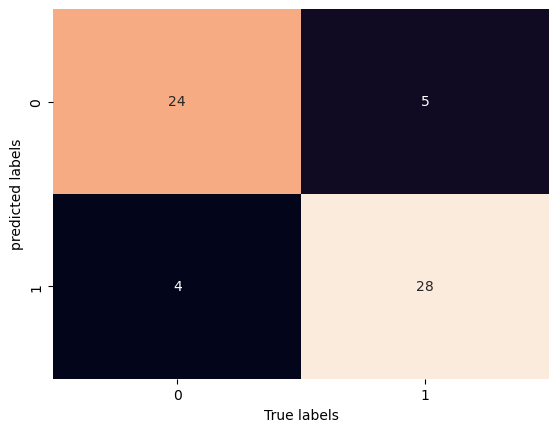

In [86]:
plot_conf_mat(y_test, y_preds)

In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Calculating Evaluation Matrix usin cross_val_score

In [89]:
def evaluate_preds(X,y,cv=5):
    """
    Evaluate predictions using cross validation
    """
    accuracy=cross_val_score(clf,X,y,scoring='accuracy', cv=5)
    precision=cross_val_score(clf,X,y,scoring='precision', cv=5)
    recall=cross_val_score(clf,X,y,scoring='recall', cv=5)
    f1_score=cross_val_score(clf,X,y,scoring='f1', cv=5)

    matrix={
        "accuracy": np.mean(accuracy),
        "precision": np.mean(precision),
        "recall": np.mean(recall),
        "f1_score": np.mean(f1_score)
    }
    return matrix

In [90]:
metric_preds=evaluate_preds(X,y)
metric_preds

{'accuracy': np.float64(0.8214754098360656),
 'precision': np.float64(0.8337894130487511),
 'recall': np.float64(0.8484848484848484),
 'f1_score': np.float64(0.8401135255097063)}

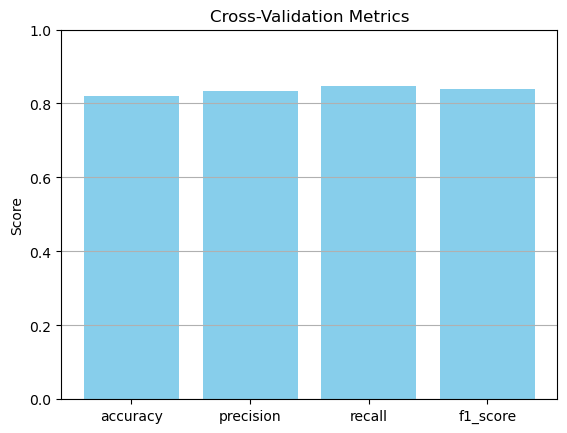

In [91]:
plt.bar(metric_preds.keys(), metric_preds.values(), color='skyblue')
plt.title("Cross-Validation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

## Feature Importance
Feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they contribute?"

In [94]:
clf.feature_importances_

array([0.09420166, 0.02624645, 0.13668582, 0.07110866, 0.0718993 ,
       0.00925328, 0.02088314, 0.12359956, 0.0438101 , 0.10967895,
       0.03622426, 0.15148219, 0.10492664])

In [95]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
feature_imp=dict(zip(df.columns, list(clf.feature_importances_)))

In [98]:
feature_imp

{'age': np.float64(0.09420166345333661),
 'sex': np.float64(0.02624644679779504),
 'cp': np.float64(0.13668581776104677),
 'trestbps': np.float64(0.07110865783345939),
 'chol': np.float64(0.07189930384677928),
 'fbs': np.float64(0.009253283479610356),
 'restecg': np.float64(0.02088313814639644),
 'thalach': np.float64(0.12359955801403254),
 'exang': np.float64(0.04381009633465058),
 'oldpeak': np.float64(0.10967894642693178),
 'slope': np.float64(0.03622425565392724),
 'ca': np.float64(0.15148218965652657),
 'thal': np.float64(0.10492664259550737)}

In [99]:
feature_df=pd.DataFrame(feature_imp, index=['coef'])

In [100]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
coef,0.094202,0.026246,0.136686,0.071109,0.071899,0.009253,0.020883,0.1236,0.04381,0.109679,0.036224,0.151482,0.104927


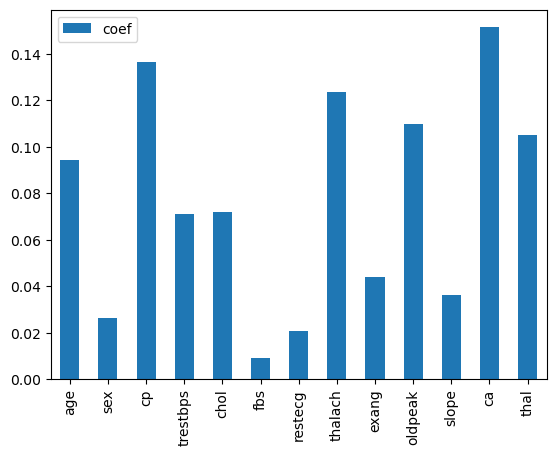

In [101]:
feature_df.T.plot.bar();

In [102]:
clf.score(X_test, y_test)

0.8524590163934426

###  Exporting the model

In [110]:
from joblib import dump, load

In [111]:
dump(clf,filename="heart_disease_classifier_random_forest.joblib")

['heart_disease_classifier_random_forest.joblib']

In [112]:
loaded_clf=load(filename="heart_disease_classifier_random_forest.joblib")

In [113]:
loaded_clf.score(X_test, y_test)

0.8524590163934426